## 빅카인즈 키워드 분석

In [2]:
import pandas as pd
import nltk
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

pd.options.display.max_rows = 999

%matplotlib inline

path='./data/'
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
keyword='교통사고' #파일명 (csv제외) 넣기

In [4]:
news= pd.read_csv(path+f'{keyword}.csv', encoding='utf-8')
print('중복제거 전 기사수: '+str(len(news)))

#중복제거
news = news.loc[news['분석제외 여부']!='중복'].reset_index(drop=True)
print('중복제거 후 기사수: '+str(len(news)))

중복제거 전 기사수: 28580
중복제거 후 기사수: 25089


In [5]:
news.head(1)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.500051e+06,20150630.0,경남신문,고휘훈,"김해 진영 좌곤삼거리 육교, 관리 떠넘기기로 '흉물'",지역>경남,NaN,NaN,NaN,NaN,NaN,NaN,남산,김해시,"김해,진영,좌곤삼,거리,육교,관리,흉물,김해,진영,육교,관리,소홀,흉물,전락,주체,...","김해시,진영,관계자,사무소,동읍우회도로,주민들,진영읍,진영국토관리사무소,좌곤삼거리,...",김해 진영의 한 육교가 관리 소홀로 인해 흉물로 전락한 가운데 관리 주체가 없어 1...,http://www.knnews.co.kr/news/articleView.php?i...,NaN


In [245]:
#news.키워드[0]

In [7]:
#트랜잭션 만들기 (기사단위)
tran_org= []

for i in range(len(news.키워드)):
    tran_org.append(str(news.키워드[i]).split(','))

In [8]:
#stop_word 지정 
stop_lst=set([])

#동의어 대체과정 {바뀌게 될 문자열:바꿀 문자열}
rep_words = {}

tran_filtered = []

for i, tran in enumerate(tran_org):
    tran_filtered.append([])
    for w in tran:
        if (w not in stop_lst) and (w not in rep_words.keys()):
            tran_filtered[i].append(w)
        elif w in rep_words.keys():
            tran_filtered[i].append(rep_words[w])

#### 명사 빈도분석그래프

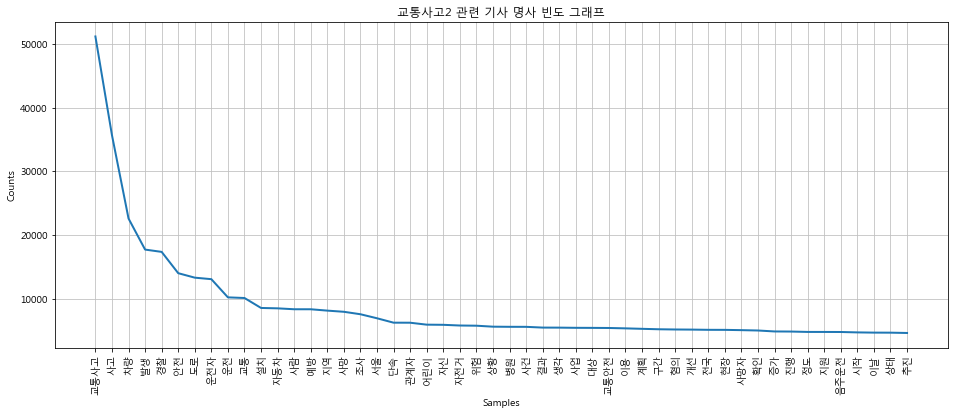

<Figure size 432x288 with 0 Axes>

In [10]:
from itertools import chain
tokens = list(chain.from_iterable(tran_filtered)) #2차원 리스트 1차원으로 풀어준다

vocab = nltk.Text(tokens)
plt.figure(figsize=(16,6))
plt.title(f'{keyword} 관련 기사 명사 빈도 그래프')
vocab.plot(50)
plt.show()
plt.savefig(f'{keyword}빈도분석(명사).png',transparent=True, dpi=100)

In [96]:
#빈도집계 자세히 확인
sorted(vocab.vocab().items(),
       key=lambda x: x[1], reverse=True)[:300] #숫자 바꾸어 상위 키워드 개수 조절

[('교통사고', 51216),
 ('사고', 35694),
 ('차량', 22595),
 ('발생', 17711),
 ('경찰', 17350),
 ('안전', 14000),
 ('도로', 13298),
 ('운전자', 13060),
 ('운전', 10201),
 ('교통', 10100),
 ('설치', 8535),
 ('자동차', 8475),
 ('사람', 8331),
 ('예방', 8329),
 ('지역', 8117),
 ('사망', 7933),
 ('조사', 7547),
 ('서울', 6914),
 ('단속', 6221),
 ('관계자', 6215),
 ('어린이', 5909),
 ('자신', 5885),
 ('자전거', 5775),
 ('위험', 5745),
 ('상황', 5592),
 ('병원', 5571),
 ('사건', 5567),
 ('결과', 5449),
 ('생각', 5442),
 ('사업', 5413),
 ('대상', 5403),
 ('교통안전', 5387),
 ('이용', 5327),
 ('계획', 5255),
 ('구간', 5186),
 ('혐의', 5150),
 ('개선', 5133),
 ('전국', 5098),
 ('현장', 5091),
 ('사망자', 5047),
 ('확인', 4991),
 ('증가', 4842),
 ('진행', 4826),
 ('정도', 4767),
 ('지원', 4764),
 ('음주운전', 4756),
 ('시작', 4693),
 ('이날', 4658),
 ('상태', 4650),
 ('추진', 4602),
 ('교육', 4535),
 ('치료', 4469),
 ('승용차', 4427),
 ('운영', 4369),
 ('보행자', 4336),
 ('버스', 4278),
 ('예정', 4249),
 ('위반', 4180),
 ('보험', 4172),
 ('사진', 4124),
 ('정부', 4020),
 ('피해자', 4020),
 ('신고', 3869),
 ('마련', 3865),
 ('사회', 3846),


### 워드클라우드(명사)

In [11]:
불용어 = set([])
text_noun = ' '.join(tokens)

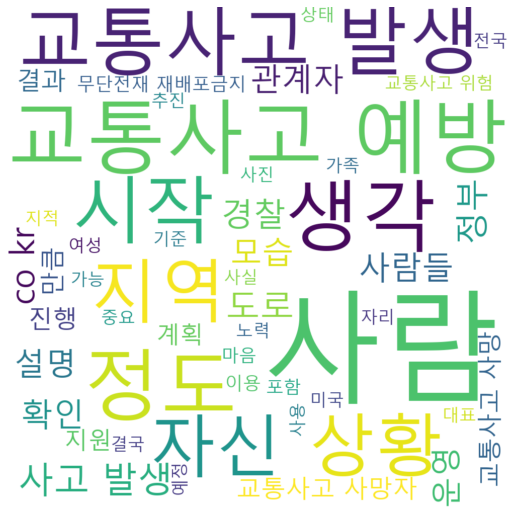

In [12]:
wordc = WordCloud( 
    width = 1000,
    height = 1000,background_color='white',
    font_path='C:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.5, 
    max_words=50,
    stopwords=불용어)
wordc.generate(text_noun)
plt.figure(figsize=(9,16))
plt.imshow(wordc, interpolation = 'bilinear')
plt.axis('off')
plt.savefig(path + f'{keyword}워드클라우드(명사).png',transparent=False)

### 연관분석 단계

In [13]:
from apyori import apriori
rules = apriori(tran_filtered, min_support=0.1, min_confidence=0.1)
results= list(rules)

In [14]:
result_df = pd.DataFrame(None, columns=['lhs','rhs','support','confidence','lift'])
index=0
for result in results:
    support = result[1]
    ordered_statistic = result[2]
    for item in ordered_statistic:
        lhs = ' '.join(x.strip() for x in item[0])
        rhs = ' '.join(x.strip() for x in item[1])
        confidence = item[2]
        lift = item[3]
        result_df.loc[index] = [lhs, rhs, support, confidence, lift]
        index +=1

In [16]:
result_df

,lhs,rhs,support,confidence,lift
0,,개선,0.112121,0.112121,1.000000
1,,결과,0.158117,0.158117,1.000000
2,,경찰,0.281956,0.281956,1.000000
3,,계획,0.144804,0.144804,1.000000
4,,관계자,0.202838,0.202838,1.000000
5,,교통,0.204831,0.204831,1.000000
6,,교통사고,0.979593,0.979593,1.000000
7,,대상,0.146479,0.146479,1.000000
8,,도로,0.249392,0.249392,1.000000
9,,마련,0.119056,0.119056,1.000000


### 연관분석 결과저장

In [18]:
pd.DataFrame(result_df).to_csv(f'{keyword}_신뢰지지.csv',encoding='cp949',index=False)

### 결과물로 DATA에 크롤링데이터 하나, 산출물에 그래프, 워드클라우드, 연관분석결과 저장되어야함